## Dataset Description

This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file Walmart_Store_sales. Within this file you will find the following fields:

Store - the store number

Date - the week of sales

Weekly_Sales -  sales for the given store

Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week

Temperature - Temperature on the day of sale

Fuel_Price - Cost of fuel in the region

CPI – Prevailing consumer price index

Unemployment - Prevailing unemployment rate

In [1]:
# Import necessary libraries & conditions
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)

In [2]:
# Import the Walmart_Store_sales.csv dataset
walmart_store_sales=pd.read_csv\
(r"C:\Users\brianlimcn\OneDrive\Desktop\Simplilearn\02 Data Science with Python\Assessment - Project 4\Walmart_Store_sales.csv")

# View the dataset shape
walmart_store_sales.shape

(6435, 8)

In [3]:
# View some observations
walmart_store_sales.head(-5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6425,45,24-08-2012,718232.26,0,72.62,3.834,191.344887,8.684
6426,45,31-08-2012,734297.87,0,75.09,3.867,191.461281,8.684
6427,45,07-09-2012,766512.66,1,75.70,3.911,191.577676,8.684
6428,45,14-09-2012,702238.27,0,67.87,3.948,191.699850,8.684


### Which store has maximum sales

In [4]:
# Which store has maximum sales
walmart_store_sales.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [5]:
max_sales_store_df=walmart_store_sales.groupby(['Store'])['Weekly_Sales'].sum().reset_index()
# groups the data by 'Store' and then sums by each store's 'Weekly_Sales'
# the index is then reset using .reset_index() and stored under max_sales_store_df
# note: this does not rewrite the data in the original 'Weekly_Sales' under 'walmart_store_sales'
max_sales_store_df.rename({'Weekly_Sales': 'Weekly_Sales_Sum'}, axis=1, inplace=True)
# rename to 'Weekly_Sales_Sum'
max_sales_store_df

,Store,Weekly_Sales_Sum
0,1,2.224028e+08
1,2,2.753824e+08
2,3,5.758674e+07
3,4,2.995440e+08
4,5,4.547569e+07
5,6,2.237561e+08
6,7,8.159828e+07
7,8,1.299512e+08
8,9,7.778922e+07
9,10,2.716177e+08


In [6]:
max_sales_store_name=max_sales_store_df.loc[max_sales_store_df['Weekly_Sales_Sum'].idxmax(), 'Store']
# finds the store name/number in column 'Store' that has the maximum value of 'Weekly_Sales_Sum'

max_sales_store_val=max_sales_store_df.loc[max_sales_store_df['Weekly_Sales_Sum'].idxmax(), 'Weekly_Sales_Sum']
# finds what this maximum value is

print('The store with the highest volume of sales is',max_sales_store_name,\
      ', and it has a total sales volume of',max_sales_store_val)

The store with the highest volume of sales is 20 , and it has a total sales volume of 301397792.46000004


### Which store has maximum standard deviation

In [7]:
# First, find the standard deviations of each store
max_std_store_df=walmart_store_sales.groupby(['Store'])['Weekly_Sales'].agg(np.std).reset_index()
max_std_store_df.rename({'Weekly_Sales': 'Weekly_Sales_Std'}, axis=1, inplace=True)
max_std_store_df

,Store,Weekly_Sales_Std
0,1,155980.767761
1,2,237683.694682
2,3,46319.631557
3,4,266201.442297
4,5,37737.965745
5,6,212525.855862
6,7,112585.469220
7,8,106280.829881
8,9,69028.666585
9,10,302262.062504


In [8]:
max_std_store_name=max_std_store_df.loc[max_std_store_df['Weekly_Sales_Std'].idxmax(), 'Store']
# finds the store name/number in column 'Store' that has the maximum value of 'Weekly_Sales_Std'

max_std_store_val=max_std_store_df.loc[max_std_store_df['Weekly_Sales_Std'].idxmax(), 'Weekly_Sales_Std']
# finds what this maximum value is

print('The store with the highest standard deviation is',max_std_store_name,\
      ', which has a value of',max_std_store_val)

The store with the highest standard deviation is 14 , which has a value of 317569.9494755081


### Also, find out the coefficient of mean to standard deviation

In [9]:
# For this part, we need to find the mean of each store, before applying the Coefficient of Variation formula
mean_store_df=walmart_store_sales.groupby(['Store'])['Weekly_Sales'].mean().reset_index()
mean_store_df.rename({'Weekly_Sales': 'Weekly_Sales_Mean'}, axis=1, inplace=True)
mean_store_df

,Store,Weekly_Sales_Mean
0,1,1.555264e+06
1,2,1.925751e+06
2,3,4.027044e+05
3,4,2.094713e+06
4,5,3.180118e+05
5,6,1.564728e+06
6,7,5.706173e+05
7,8,9.087495e+05
8,9,5.439806e+05
9,10,1.899425e+06


In [10]:
# Now, we apply the formula: Coefficient of Variation = (Standard Deviation / Mean) * 100
# We can do this by using the two dataframes we just created (mean_store_df & max_std_store_df)
# and then saving it under 'coef_var_df'

coef_var_df=max_std_store_df['Weekly_Sales_Std']/mean_store_df['Weekly_Sales_Mean']*100
coef_var_df

0     10.029212
1     12.342388
2     11.502141
3     12.708254
4     11.866844
5     13.582286
6     19.730469
7     11.695283
8     12.689547
9     15.913349
10    12.226183
11    13.792532
12    13.251363
13    15.713674
14    19.338399
15    16.518065
16    12.552067
17    16.284550
18    13.268012
19    13.090269
20    17.029239
21    15.678288
22    17.972115
23    12.363738
24    15.986040
25    11.011066
26    13.515544
27    13.732974
28    18.374247
29     5.200804
30     9.016105
31    11.831049
32     9.286835
33    10.822524
34    22.968111
35    16.257891
36     4.208412
37    11.087545
38    14.990779
39    12.342978
40    14.817711
41     9.033533
42     6.410363
43     8.179331
44    16.561273
dtype: float64

In [11]:
# Lets add this new dataframe to the end of 'max_std_store_df'
max_std_store_df['Coef_of_Var']=coef_var_df
max_std_store_df

,Store,Weekly_Sales_Std,Coef_of_Var
0,1,155980.767761,10.029212
1,2,237683.694682,12.342388
2,3,46319.631557,11.502141
3,4,266201.442297,12.708254
4,5,37737.965745,11.866844
5,6,212525.855862,13.582286
6,7,112585.469220,19.730469
7,8,106280.829881,11.695283
8,9,69028.666585,12.689547
9,10,302262.062504,15.913349


In [12]:
# Finally, we sort it into a new dataframe called 'sorted_max_std_store' to make a comparison
sorted_max_std_store_df=max_std_store_df.sort_values(by=['Coef_of_Var'], ascending=False)
sorted_max_std_store_df
# This comparison tells us that Store 35 tends to have the largest variation in sales, of up to 22.97% from its mean
# At the same time, Store 37 tends to have the most stable variation in sales, of just 4.21% from its mean

,Store,Weekly_Sales_Std,Coef_of_Var
34,35,211243.457791,22.968111
6,7,112585.469220,19.730469
14,15,120538.652043,19.338399
28,29,99120.136596,18.374247
22,23,249788.038068,17.972115
20,21,128752.812853,17.029239
44,45,130168.526635,16.561273
15,16,85769.680133,16.518065
17,18,176641.510839,16.284550
35,36,60725.173579,16.257891


### Which store(s) has good quarterly growth rate in Q3'2012

In [13]:
# According to the assignment details, the data "covers sales from 2010-02-05 to 2012-11-01"
# We must first group the sales data into quarters, and then group that by Store

In [14]:
# First, we can see here that the date is an object. 
walmart_store_sales.info()
walmart_store_sales.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [15]:
# It therefore needs to be converted to datetime datatype, with formatting 
# The format '%d-%m-%Y' tells the 'to_datetime' how to parse the data in 'Date' correctly
# If not, the months could be confused with days
walmart_store_sales['Date']=pd.to_datetime(walmart_store_sales['Date'], format='%d-%m-%Y')
# Now just to check that it is now in datetime format:
walmart_store_sales.info()
# And that there is any change visually:
walmart_store_sales.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [16]:
# Drop all non-relevant columns to the question
quarterly_sales_0 = walmart_store_sales.drop(['Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment'], axis=1)
quarterly_sales_0

,Store,Date,Weekly_Sales
0,1,2010-02-05,1643690.90
1,1,2010-02-12,1641957.44
2,1,2010-02-19,1611968.17
3,1,2010-02-26,1409727.59
4,1,2010-03-05,1554806.68
...,...,...,...
6430,45,2012-09-28,713173.95
6431,45,2012-10-05,733455.07
6432,45,2012-10-12,734464.36
6433,45,2012-10-19,718125.53


In [17]:
# Set 'Date' as a new index, then use the pd.Grouper to group it by quarter 'Q' and by 'Store'
# Applies a sum to the 'Weekly_Sales' data while doing this grouping
quarterly_sales_1=quarterly_sales_0.set_index('Date').groupby([pd.Grouper(freq='Q'), 'Store']).sum()
quarterly_sales_1

Weekly_Sales
Date       Store              
2010-03-31 1       12178638.08
           2       15942113.37
           3        3245878.82
           4       15824390.55
           5        2343866.68
           6       12584072.71
           7        4084727.62
           8        7164781.20
           9        4059419.05
           10      16258128.55
           11      11310733.15
           12       8378265.17
           13      15328837.19
           14      17138032.50
           15       4955612.67
           16       3739624.59
           17       6273645.51
           18       9110759.45
           19      11657130.86
           20      16547027.02
           21       6098120.55
           22       7898426.53
           23      10522880.36
           24      10549468.34
           25       5248226.38
           26       7670568.08
           27      13731842.76
           28      11725195.29
           29       4203091.43
           30       3727301.77
           31      11143901.01
           32       8642677.94
           33       2299155.24
           34       7452915.99
           35       9200130.38
           36       3609839.04
           37       4097927.49
           38       2745319.08
           39       9943330.69
           40       7395213.26
           41       8315515.34
           42       4260671.24
           43       5202832.02
           44       2211695.24
           45       6230855.35
2010-06-30 1       19436822.02
           2       25367303.89
           3        4846326.40
           4       24456978.54
           5        4039168.42
           6       21177229.33
           7        5878724.13
           8       11377001.36
           9        6755216.11
           10      24472636.06
           11      17212781.46
           12      12861849.27
           13      25216748.15
           14      29039924.35
           15       8462332.25
           16       5962988.52
           17      11013273.16
           18      15278831.50
           19      19322354.31
           20      26696176.19
           21       9742561.66
           22      13573686.34
           23      18128295.23
           24      17859370.24
           25       9590333.08
           26      12902480.04
           27      24901070.24
           28      17087928.73
           29       7125112.93
           30       5945123.56
           31      17436683.89
           32      14628371.67
           33       3806035.41
           34      12125806.07
           35      15139217.15
           36       6012154.54
           37       6666390.60
           38       4506935.36
           39      17409179.32
           40      12290145.62
           41      15027180.12
           42       6920671.35
           43       8664111.22
           44       3666642.99
           45      10339321.97
2010-09-30 1       19150229.91
           2       24294571.41
           3        4677436.11
           4       24509634.50
           5        3793442.31
           6       19818639.28
           7        7324631.54
           8       10980771.86
           9        6342670.43
           10      23589722.75
           11      16784486.82
           12      12170302.95
           13      24478949.34
           14      27358314.58
           15       8213151.57
           16       7308664.49
           17      11300617.25
           18      14410726.30
           19      19084621.85
           20      25916754.86
           21       9658428.18
           22      13067869.27
           23      17757214.83
           24      18204864.36
           25       8953231.93
           26      13199765.58
           27      24277771.34
           28      16492035.55
           29       6765707.15
           30       5806764.64
           31      16988177.39
           32      14429218.24
           33       3316841.73
           34      11967538.31
           35      13621940.53
           36       5785089.89
           37       6481530.55
           38      

In [18]:
# Since I am only interested in quarterly growth performance during 3Q'2012, I can apply a growth operation 
# of 3Q2012 over 2Q2012:

# Start by finding the data for the quarters of 2Q2012 and 3Q2012 and renaming them accordingly
quarterly_sales_2=quarterly_sales_1.loc['2012-06-30'].rename(columns={'Weekly_Sales': 'Weekly_Sales_Sum_2Q2012'})
quarterly_sales_3=quarterly_sales_1.loc['2012-09-30'].rename(columns={'Weekly_Sales': 'Weekly_Sales_Sum_3Q2012'})

# Now to just view the new dataframes that were just created
quarterly_sales_2

Weekly_Sales_Sum_2Q2012
Date       Store                         
2012-06-30 1                  20978760.12
           2                  25083604.88
           3                   5620316.49
           4                  28454363.67
           5                   4466363.69
           6                  20833909.92
           7                   7290859.27
           8                  11919630.95
           9                   7484935.11
           10                 23750369.17
           11                 17787371.95
           12                 13362388.58
           13                 27009207.14
           14                 25155535.41
           15                  7955243.07
           16                  6564335.98
           17                 12592400.93
           18                 13896194.65
           19                 18367300.24
           20                 27524197.32
           21                  9294596.35
           22                 13487894.06
           23                 18488882.82
           24                 17684218.91
           25                  9323012.09
           26                 13155335.57
           27                 22744012.75
           28                 16506893.13
           29                  7125307.50
           30                  5742314.29
           31                 18267238.50
           32                 15489271.05
           33                  3549000.39
           34                 12853618.02
           35                 10838313.00
           36                  4151991.58
           37                  6824549.37
           38                  5637918.82
           39                 20214128.46
           40                 12727737.53
           41                 17659942.73
           42                  7568239.27
           43                  8168836.35
           44                  4306405.78
           45                 10390767.83

In [19]:
quarterly_sales_3

Weekly_Sales_Sum_3Q2012
Date       Store                         
2012-09-30 1                  20253947.78
           2                  24303354.86
           3                   5298005.47
           4                  27796792.46
           5                   4163790.99
           6                  20167312.24
           7                   8262787.39
           8                  11748952.70
           9                   7022149.56
           10                 23037258.76
           11                 17516081.44
           12                 12536324.37
           13                 26421259.30
           14                 21187560.65
           15                  7612081.03
           16                  7121541.64
           17                 12459453.05
           18                 13489765.27
           19                 18203554.85
           20                 26891526.98
           21                  9027599.32
           22                 12845139.71
           23                 18641489.15
           24                 17976377.72
           25                  9109081.84
           26                 13675691.91
           27                 22307711.41
           28                 16080704.97
           29                  6671234.14
           30                  5594701.86
           31                 17806714.45
           32                 15396528.95
           33                  3433620.36
           34                 12485995.94
           35                 11322421.12
           36                  3831691.64
           37                  6728068.24
           38                  5605482.38
           39                 20715116.23
           40                 12873195.37
           41                 18093844.01
           42                  7296759.34
           43                  8000572.16
           44                  4411251.16
           45                  9581268.38

In [20]:
# merge the 'Weekly_Sales_Sum_x' data. We can discard the heirarchical index 'Date' by this point
quarterly_sales_4=quarterly_sales_2.merge(quarterly_sales_3, how='left', on=[('Store')])
quarterly_sales_4

,Weekly_Sales_Sum_2Q2012,Weekly_Sales_Sum_3Q2012
Store,,
1,20978760.12,20253947.78
2,25083604.88,24303354.86
3,5620316.49,5298005.47
4,28454363.67,27796792.46
5,4466363.69,4163790.99
6,20833909.92,20167312.24
7,7290859.27,8262787.39
8,11919630.95,11748952.70
9,7484935.11,7022149.56


In [21]:
# Then create a new column in 'quarterly_sales_4' and apply a growth operation there from the two dataframes
quarterly_sales_4['ThirdQ_Growth']= \
((quarterly_sales_4['Weekly_Sales_Sum_3Q2012']/quarterly_sales_4['Weekly_Sales_Sum_2Q2012'])-1)

quarterly_sales_4

,Weekly_Sales_Sum_2Q2012,Weekly_Sales_Sum_3Q2012,ThirdQ_Growth
Store,,,
1,20978760.12,20253947.78,-0.034550
2,25083604.88,24303354.86,-0.031106
3,5620316.49,5298005.47,-0.057347
4,28454363.67,27796792.46,-0.023110
5,4466363.69,4163790.99,-0.067745
6,20833909.92,20167312.24,-0.031996
7,7290859.27,8262787.39,0.133308
8,11919630.95,11748952.70,-0.014319
9,7484935.11,7022149.56,-0.061829


In [22]:
# Then we sort by the growth rate
sorted_quarterly_sales_4=quarterly_sales_4.sort_values(by=['ThirdQ_Growth'], ascending=False)
sorted_quarterly_sales_4

,Weekly_Sales_Sum_2Q2012,Weekly_Sales_Sum_3Q2012,ThirdQ_Growth
Store,,,
7,7290859.27,8262787.39,0.133308
16,6564335.98,7121541.64,0.084884
35,10838313.00,11322421.12,0.044666
26,13155335.57,13675691.91,0.039555
39,20214128.46,20715116.23,0.024784
41,17659942.73,18093844.01,0.024570
44,4306405.78,4411251.16,0.024346
24,17684218.91,17976377.72,0.016521
40,12727737.53,12873195.37,0.011428


In [23]:
# We can see that the majority of stores experienced negative growth in 3Q2012
# Thus we can assume that stores with positive growth are considered to have "Good" performance during the quarter
# To isolate this, lets drop all negative values under 'ThirdQ_Growth'

filtered_quarterly_sales_4 = sorted_quarterly_sales_4[sorted_quarterly_sales_4['ThirdQ_Growth'] > 0]
filtered_quarterly_sales_4.dropna()

# Finally, we have the result of all stores that encountered positive growth in 3Q2012:
print("Stores with 'good' or 'positive' growth rates in 3Q2012 are:")
filtered_quarterly_sales_4

Stores with 'good' or 'positive' growth rates in 3Q2012 are:


,Weekly_Sales_Sum_2Q2012,Weekly_Sales_Sum_3Q2012,ThirdQ_Growth
Store,,,
7,7290859.27,8262787.39,0.133308
16,6564335.98,7121541.64,0.084884
35,10838313.00,11322421.12,0.044666
26,13155335.57,13675691.91,0.039555
39,20214128.46,20715116.23,0.024784
41,17659942.73,18093844.01,0.024570
44,4306405.78,4411251.16,0.024346
24,17684218.91,17976377.72,0.016521
40,12727737.53,12873195.37,0.011428


### Some holidays have a negative impact on sales. 
### Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

In [24]:
# sum all store data by date. drop all holiday data from dataset. find mean of remainder. 
# take holiday data and find where holiday data > mean sales

#### Holiday Events

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13

Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13

Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13

Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

In [25]:
# To begin, we can drop all non-relevant columns and sum the Weekly Sales data by date

#Drop irrelevant columns
holiday_sales_0=walmart_store_sales.drop(['Store','Temperature','Fuel_Price','CPI','Unemployment'], axis=1)

#Convert Date column to datetime format 
holiday_sales_0['Date']=pd.to_datetime(holiday_sales_0['Date'], format='%d-%m-%Y')

# Sum by date
holiday_sales_1=holiday_sales_0.groupby(['Date'])['Weekly_Sales'].sum().reset_index()

holiday_sales_1

,Date,Weekly_Sales
0,2010-02-05,49750740.50
1,2010-02-12,48336677.63
2,2010-02-19,48276993.78
3,2010-02-26,43968571.13
4,2010-03-05,46871470.30
5,2010-03-12,45925396.51
6,2010-03-19,44988974.64
7,2010-03-26,44133961.05
8,2010-04-02,50423831.26
9,2010-04-09,47365290.44


In [26]:
# Now to find the mean of non-holiday sales:
# First, assign a dataframe of holidays as type datetime using to_datetime

holiday_list = pd.DataFrame(['12-Feb-10', '11-Feb-11', '10-Feb-12', '8-Feb-13','10-Sep-10', '9-Sep-11', '7-Sep-12'\
                , '6-Sep-13','26-Nov-10', '25-Nov-11', '23-Nov-12', '29-Nov-13','31-Dec-10', '30-Dec-11'\
                , '28-Dec-12', '27-Dec-13'], columns=['Holidays'])

pd.to_datetime(holiday_list['Holidays'], format='%d-%b-%y')

holiday_list

,Holidays
0,12-Feb-10
1,11-Feb-11
2,10-Feb-12
3,8-Feb-13
4,10-Sep-10
5,9-Sep-11
6,7-Sep-12
7,6-Sep-13
8,26-Nov-10
9,25-Nov-11


In [27]:
# Then we filter out dates in holiday_sales_1 that are in holiday_list
# the character '~' indicates NOT IN
holiday_sales_2 = holiday_sales_1[~holiday_sales_1.Date.isin(holiday_list.Holidays)]
# And return the mean
mean_non_holidays = holiday_sales_2['Weekly_Sales'].mean()
mean_non_holidays

46856537.1093985

In [28]:
# Now, we find the sales specifically during  holidays
holiday_sales_3 = holiday_sales_1[holiday_sales_1.Date.isin(holiday_list.Holidays)]
holiday_sales_3

,Date,Weekly_Sales
1,2010-02-12,48336677.63
31,2010-09-10,45634397.84
42,2010-11-26,65821003.24
47,2010-12-31,40432519.00
53,2011-02-11,47336192.79
83,2011-09-09,46763227.53
94,2011-11-25,66593605.26
99,2011-12-30,46042461.04
105,2012-02-10,50009407.92
135,2012-09-07,48330059.31


In [29]:
# compare its values to find holiday sales are more than the mean of non-holiday sales
holiday_sales_4=holiday_sales_3.copy()
holiday_sales_4['Weekly_Sales']=holiday_sales_4['Weekly_Sales'] > mean_non_holidays
# before finally saving it as holiday_sales_4. drop=True will reset the index without a new column
holiday_sales_4.reset_index(drop=True)

,Date,Weekly_Sales
0,2010-02-12,True
1,2010-09-10,False
2,2010-11-26,True
3,2010-12-31,False
4,2011-02-11,True
5,2011-09-09,False
6,2011-11-25,True
7,2011-12-30,False
8,2012-02-10,True
9,2012-09-07,True


In [30]:
# print statement of results using for loop and if condition
# datetime is imported in order to determine what the holiday name is using a nested-if function

import datetime

print('The dates of holidays where Weekly Sales are greater than the mean sales of the non-holiday season are: \n')

for i in range(0, len(holiday_sales_4)):
    comparison=holiday_sales_4.iloc[i]['Weekly_Sales']
    if comparison == True:
        date_of_true=holiday_sales_4.iloc[i]['Date']

        # nested-if to determine the holiday name       
        if (date_of_true==datetime.datetime(2010, 2, 12) or 
            date_of_true==datetime.datetime(2011, 2, 11) or 
            date_of_true==datetime.datetime(2012, 2, 10) or 
            date_of_true==datetime.datetime(2013, 2, 8)):
            return_holiday="Superbowl"
            print(date_of_true.strftime('%d-%b-%y'),'-', return_holiday)
        elif (date_of_true==datetime.datetime(2010, 9, 10) or 
              date_of_true==datetime.datetime(2011, 9, 9) or 
              date_of_true==datetime.datetime(2012, 9, 7) or 
              date_of_true==datetime.datetime(2013, 9, 6)):
            return_holiday="Labour Day"
            print(date_of_true.strftime('%d-%b-%y'),'-', return_holiday)
        elif (date_of_true==datetime.datetime(2010, 11, 26) or 
              date_of_true==datetime.datetime(2011, 11, 25) or 
              date_of_true==datetime.datetime(2012, 11, 23) or 
              date_of_true==datetime.datetime(2013, 11, 29)):
            return_holiday="Thanksgiving"
            print(date_of_true.strftime('%d-%b-%y'),'-', return_holiday)
        elif (date_of_true==datetime.datetime(2010, 12, 31) or 
              date_of_true==datetime.datetime(2011, 12, 30) or 
              date_of_true==datetime.datetime(2012, 12, 28) or 
              date_of_true==datetime.datetime(2013, 12, 27)):
            return_holiday="Christmas"
            print(date_of_true.strftime('%d-%b-%y'),'-', return_holiday)
        # /nested-if to determine the holiday name 

# note: strftime() allows for a datetime object to be printed in a particular format

The dates of holidays where Weekly Sales are greater than the mean sales of the non-holiday season are: 

12-Feb-10 - Superbowl
26-Nov-10 - Thanksgiving
11-Feb-11 - Superbowl
25-Nov-11 - Thanksgiving
10-Feb-12 - Superbowl
07-Sep-12 - Labour Day


### Provide a monthly and semester view of sales in units and give insights

In [31]:
# Once again, set Date to datetime format
walmart_store_sales['Date']=pd.to_datetime(walmart_store_sales['Date'], format='%d-%m-%Y')

# Drop all non-relevant columns to the question
temporary_df = walmart_store_sales.drop(['Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment'], axis=1)

# Create two dataframes, one for monthly data, one for semester data
# In India, there are two school semesters a year. Lets therefore assume Semester refers to a 6-month period
# This would equate to a frequency of 2Q
semester_sales_0=temporary_df.set_index('Date').groupby([pd.Grouper(freq='2Q'), 'Store']).sum()
monthly_sales_0=temporary_df.set_index('Date').groupby([pd.Grouper(freq='M'), 'Store']).sum()

# rename the columns of Weekly_Sales
semester_sales_0.rename({'Weekly_Sales': 'Semester_Sales'}, axis=1, inplace=True)
monthly_sales_0.rename({'Weekly_Sales': 'Monthly_Sales'}, axis=1, inplace=True)

Monthly sales tend to peak in December, which is likely due to holiday sales during Christmas
Monthly sales are also the lowest in January, which is the month after the holiday season


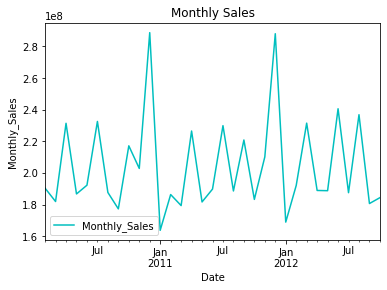

In [32]:
# insight 1

# groupby month to create a plot and identify patterns
monthly_sales_1=monthly_sales_0.groupby(['Date']).sum().reset_index()

import matplotlib.pyplot as plt
%matplotlib inline

print('Monthly sales tend to peak in December, which is likely due to holiday sales during Christmas')
print('Monthly sales are also the lowest in January, which is the month after the holiday season')
monthly_sales_1.plot(x='Date', y='Monthly_Sales', style='c') 
plt.title('Monthly Sales') 
plt.xlabel('Date')  
plt.ylabel('Monthly_Sales')  
plt.show()

In [59]:
# insight 2, 3, 4

# find max sales month and corresponding date
max_monthly_sale0=monthly_sales_1['Monthly_Sales'].max()
max_monthly_sale1=monthly_sales_1.loc[monthly_sales_1.Monthly_Sales == monthly_sales_1.Monthly_Sales.max(), 'Date'].values[0]

# find min sales month and corresponding date
min_monthly_sale0=monthly_sales_1['Monthly_Sales'].min()
min_monthly_sale1=monthly_sales_1.loc[monthly_sales_1.Monthly_Sales == monthly_sales_1.Monthly_Sales.min(), 'Date'].values[0]

# find mean of monthly sales
mean_monthly_sale0=monthly_sales_1['Monthly_Sales'].mean()

# note: need to run np.datetime_as_string to convert numpy.datetime64 object to string for printing
print('The month with the max sales was',np.datetime_as_string(max_monthly_sale1, unit='M'),'at a value of',max_monthly_sale0)
print('The month with the min sales was',np.datetime_as_string(min_monthly_sale1, unit='M'),'at a value of',min_monthly_sale0)
print('Meanwhile, the mean sales for all months was',mean_monthly_sale0)

The month with the max sales was 2010-12 at a value of 288760532.7200001
The month with the min sales was 2011-01 at a value of 163703966.82999995
Meanwhile, the mean sales for all months was 204158151.12454543


In [34]:
# insight 5 - Is sales in the 1st half (1H) of the year generally better than
# sales in the 2nd half (2H) of the year?
semester_sales_1=semester_sales_0.groupby(['Date']).sum().reset_index()
semester_sales_1

,Date,Semester_Sales
0,2010-03-31,3.722528e+08
1,2010-09-30,1.207858e+09
2,2011-03-31,1.238167e+09
3,2011-09-30,1.237307e+09
4,2012-03-31,1.273969e+09
5,2012-09-30,1.223303e+09
6,2013-03-31,1.843617e+08


In [35]:
# first let's drop the last row as there is only data for the first half of 2013
semester_sales_1.drop(semester_sales_1.tail(1).index,inplace=True)

# now we sum every other row starting from index=0 and index=1 
# to get the total sales for the 1H & 2H of every year, respectively
first_half_sales=int(semester_sales_1.iloc[::2, :].sum())
second_half_sales=int(semester_sales_1.iloc[1::2, :].sum())

if second_half_sales > first_half_sales:
    print('Overall sales in the 2H of each year tend to be higher than in the 1H')
else:
    print('Overall sales in the 1H of each year tend to be higher than in the 2H')

Overall sales in the 2H of each year tend to be higher than in the 1H


### Statistical Model - For Store 1 – Build  prediction models to forecast demand

Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order).

Change dates into days by creating new variable.

In [36]:
# First we keep only data for Store 1
store_1_reg_0=walmart_store_sales[walmart_store_sales['Store'] == 1]

# restructure dates as 1 for 5 Feb 2010, and save it into a new variable of integers
# The first date is converted to integer value 1, and rises for each date by the number of days lapsed in between
# Note: at this point, walmart_store_sales['Date'] is already in timestamp format due to a previous execution
store_1_reg_0['date_delta'] = ((store_1_reg_0['Date']-store_1_reg_0['Date'].min())/np.timedelta64(1,'D'))+1

# now to delete the no-longer necessary Date, Store and Holiday columns
del store_1_reg_0['Date'], store_1_reg_0['Store'], store_1_reg_0['Holiday_Flag']
store_1_reg_0

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,date_delta
0,1643690.90,42.31,2.572,211.096358,8.106,1.0
1,1641957.44,38.51,2.548,211.242170,8.106,8.0
2,1611968.17,39.93,2.514,211.289143,8.106,15.0
3,1409727.59,46.63,2.561,211.319643,8.106,22.0
4,1554806.68,46.50,2.625,211.350143,8.106,29.0
5,1439541.59,57.79,2.667,211.380643,8.106,36.0
6,1472515.79,54.58,2.720,211.215635,8.106,43.0
7,1404429.92,51.45,2.732,211.018042,8.106,50.0
8,1594968.28,62.27,2.719,210.820450,7.808,57.0
9,1545418.53,65.86,2.770,210.622857,7.808,64.0


### Linear Regression

Hypothesize if CPI, unemployment, and fuel price have any impact on sales.

Select the model which gives best accuracy.

In [37]:
# check if there is any null values to address
store_1_reg_0.isnull().sum()

Weekly_Sales    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
date_delta      0
dtype: int64

In [38]:
# import some libraries for running hypotheses and regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
%matplotlib inline

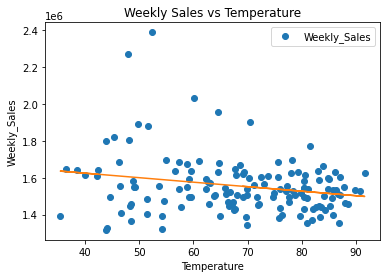

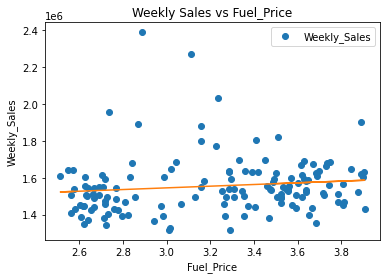

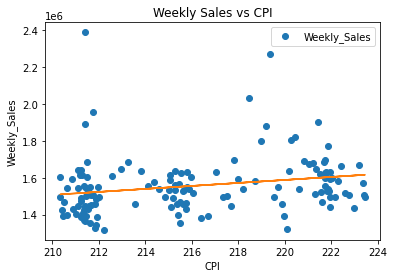

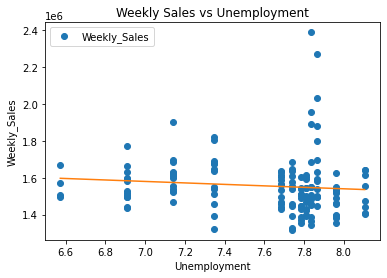

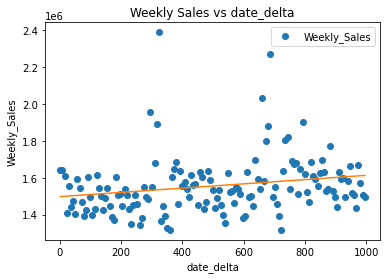

In [39]:
# let’s plot Weekly Sales against the other variables and see if we eyeball any relationship between them
# To help us see any trend, we can use polyfit to add a line of best fit
from numpy.polynomial.polynomial import polyfit

# -------------------------------------------------------------------------
# Plot with Temperature
y=np.array(store_1_reg_0['Weekly_Sales'])
x=np.array(store_1_reg_0['Temperature'])
b, m = polyfit(x, y, 1)

store_1_reg_0.plot(x='Temperature', y='Weekly_Sales', style='o') 
plt.plot(x, b + m * x, '-')
plt.title('Weekly Sales vs Temperature') 
plt.xlabel('Temperature')  
plt.ylabel('Weekly_Sales')  
plt.show()

# -------------------------------------------------------------------------
# Plot with Fuel Price
y=np.array(store_1_reg_0['Weekly_Sales'])
x=np.array(store_1_reg_0['Fuel_Price'])
b, m = polyfit(x, y, 1)

store_1_reg_0.plot(x='Fuel_Price', y='Weekly_Sales', style='o') 
plt.plot(x, b + m * x, '-')
plt.title('Weekly Sales vs Fuel_Price') 
plt.xlabel('Fuel_Price')  
plt.ylabel('Weekly_Sales')  
plt.show()


# -------------------------------------------------------------------------
# Plot with CPI
y=np.array(store_1_reg_0['Weekly_Sales'])
x=np.array(store_1_reg_0['CPI'])
b, m = polyfit(x, y, 1)

store_1_reg_0.plot(x='CPI', y='Weekly_Sales', style='o')  
plt.plot(x, b + m * x, '-')
plt.title('Weekly Sales vs CPI')
plt.xlabel('CPI')  
plt.ylabel('Weekly_Sales')  
plt.show()


# -------------------------------------------------------------------------
# Plot with Unemployment
y=np.array(store_1_reg_0['Weekly_Sales'])
x=np.array(store_1_reg_0['Unemployment'])
b, m = polyfit(x, y, 1)

store_1_reg_0.plot(x='Unemployment', y='Weekly_Sales', style='o')  
plt.plot(x, b + m * x, '-')
plt.title('Weekly Sales vs Unemployment') 
plt.xlabel('Unemployment')  
plt.ylabel('Weekly_Sales')  
plt.show()


# -------------------------------------------------------------------------
# Plot with date_delta
y=np.array(store_1_reg_0['Weekly_Sales'])
x=np.array(store_1_reg_0['date_delta'])
b, m = polyfit(x, y, 1)

store_1_reg_0.plot(x='date_delta', y='Weekly_Sales', style='o')  
plt.plot(x, b + m * x, '-')
plt.title('Weekly Sales vs date_delta') 
plt.xlabel('date_delta')  
plt.ylabel('Weekly_Sales')  
plt.show()

In [40]:
print('Unfortunately, based on these plots, there does not seem to be any visibly strong or clear relationship of these'
      +'\n' +
      'independent variables with the dependent variable'
      +'\n\n' +
      "So let's view the correlation matrix for Weekly_Sales to describe the strength of the associations of the variables")

Unfortunately, based on these plots, there does not seem to be any visibly strong or clear relationship of these
independent variables with the dependent variable

So let's view the correlation matrix for Weekly_Sales to describe the strength of the associations of the variables


In [41]:
store_1_reg_0.corr()[['Weekly_Sales']].T

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,date_delta
Weekly_Sales,1.0,-0.222701,0.124592,0.225408,-0.097955,0.214539


In [42]:
print('Based on the correlation matrix, Weekly_Sales seems to have some relationship with CPI, Unemployment and Fuel Price.'
      +'\n' +
      'However, it also looks like there is a stronger relationship with Temperature, CPI and the date_delta')

Based on the correlation matrix, Weekly_Sales seems to have some relationship with CPI, Unemployment and Fuel Price.
However, it also looks like there is a stronger relationship with Temperature, CPI and the date_delta


In [43]:
print('Therefore, we now have two possible models to test:'
      +'\n\n' +
      'Model 1: using CPI, Unemployment and Fuel Price'
      +'\n' +
      'Model 2: using Temperature, CPI and the date_delta')

Therefore, we now have to possible models to test:

Model 1: using CPI, Unemployment and Fuel Price
Model 2: using Temperature, CPI and the date_delta


In [44]:
print('Therefore our hypothesis is as follows:'
      +'\n\n' +
      'H0: Model 1 with CPI, Unemployment and Fuel Price better than Model 2 with Temperature, CPI and the date_delta'
      +'\n' +
      'H1: Reject the null hypothesis H0')

Therefore our hypothesis is as follows:

H0: Model 1 with CPI, Unemployment and Fuel Price better than Model 2 with Temperature, CPI and the date_delta
H1: Reject the null hypothesis H0


### Model 1 Regression – CPI, Unemployment and Fuel_Price

In [45]:
# We first split the dataframe into dependent and independent variables for regression testing

y=pd.DataFrame(store_1_reg_0['Weekly_Sales'])
x=pd.DataFrame(store_1_reg_0[['CPI', 'Unemployment','Fuel_Price']])

display(x.head())
display(y.head())

,CPI,Unemployment,Fuel_Price
0,211.096358,8.106,2.572
1,211.242170,8.106,2.548
2,211.289143,8.106,2.514
3,211.319643,8.106,2.561
4,211.350143,8.106,2.625


,Weekly_Sales
0,1643690.90
1,1641957.44
2,1611968.17
3,1409727.59
4,1554806.68


In [46]:
# run a train-test-split procedure
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
# random_state = 'some number' ensures that the test and train subsets are not randomized
# this is important during exploratory regression runs but should be removed during actual production

print('Length of training dataset:', len(x_train))
print('Length of test dataset:', len(x_test))

Length of training dataset: 114
Length of test dataset: 29


In [47]:
# training the machine learning algorithm
model = LinearRegression()  
model.fit(x_train, y_train)

LinearRegression()

In [48]:
# predict the output by passing the x_test variable
model.predict(x_test)

array([[1501010.69725645],
       [1575084.38260644],
       [1494987.18566273],
       [1509286.90811836],
       [1505701.04716673],
       [1534682.64942999],
       [1585114.03743601],
       [1563316.2949252 ],
       [1572334.93894184],
       [1592560.69477361],
       [1625506.68966447],
       [1583815.25606454],
       [1496368.16914382],
       [1641729.58600973],
       [1549226.05662232],
       [1517330.07861606],
       [1564112.5261559 ],
       [1584972.63264028],
       [1579772.92574668],
       [1510906.21383275],
       [1497897.72358974],
       [1590968.2360246 ],
       [1505925.13361089],
       [1515158.47685401],
       [1499140.42111304],
       [1513550.71525164],
       [1553824.24070494],
       [1585188.61865862],
       [1504227.93769887]])

In [49]:
# Now let’s test the accuracy of our model
model_1_score="{:.2%}".format(model.score(x_test,y_test))
print('Model 1 Score is:', model_1_score)

Model 1 Score is: 0.17%


In [50]:
# transpose and sort a dataframe of the coefficients
model_1_coef = pd.DataFrame(model.coef_, columns=x.columns)
model_1_coef = model_1_coef.T
print('Model 1 Coefficients are:')
model_1_coef.sort_values(0, ascending=False)

Model 1 Coefficients are:


,0
Unemployment,117877.851570
CPI,21040.963683
Fuel_Price,-74665.853711


### Model 2 Regression – Temperature, CPI and date_delta

In [51]:
# We first split the dataframe into dependent and independent variables for regression testing

y=pd.DataFrame(store_1_reg_0['Weekly_Sales'])
x=pd.DataFrame(store_1_reg_0[['Temperature', 'CPI','date_delta']])

display(x.head())
display(y.head())

,Temperature,CPI,date_delta
0,42.31,211.096358,1.0
1,38.51,211.242170,8.0
2,39.93,211.289143,15.0
3,46.63,211.319643,22.0
4,46.50,211.350143,29.0


,Weekly_Sales
0,1643690.90
1,1641957.44
2,1611968.17
3,1409727.59
4,1554806.68


In [52]:
# run a train-test-split procedure
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
# random_state = 'some number' ensures that the test and train subsets are not randomized
# this is important during exploratory regression runs but should be removed during actual production

print('Length of training dataset:', len(x_train))
print('Length of test dataset:', len(x_test))

Length of training dataset: 114
Length of test dataset: 29


In [53]:
# training the machine learning algorithm
model = LinearRegression()  
model.fit(x_train, y_train)

LinearRegression()

In [54]:
# predict the output by passing the x_test variable
model.predict(x_test)

array([[1546650.29049324],
       [1580822.53265538],
       [1477218.87327928],
       [1545995.52721838],
       [1478658.34158559],
       [1541806.0124609 ],
       [1601552.77314363],
       [1570413.5623805 ],
       [1555300.61408072],
       [1620615.3025975 ],
       [1583298.39829886],
       [1574787.789388  ],
       [1516496.30144961],
       [1622759.40865875],
       [1617544.508278  ],
       [1481336.61114517],
       [1519583.75763022],
       [1573380.82596339],
       [1588398.4512941 ],
       [1473394.60893655],
       [1530749.60637238],
       [1525867.42576273],
       [1555526.60463645],
       [1467377.14119553],
       [1533076.15805455],
       [1482018.12042525],
       [1585821.28603995],
       [1631984.69522105],
       [1554866.79056645]])

In [55]:
# Now let’s test the accuracy of our model
model_2_score="{:.2%}".format(model.score(x_test,y_test))
print('Model 2 Score is:', model_2_score)

Model 2 Score is: 11.11%


In [56]:
# transpose and sort a dataframe of the coefficients
model_2_coef = pd.DataFrame(model.coef_, columns=x.columns)
model_2_coef = model_2_coef.T
print('Model 2 Coefficients are:')
model_2_coef.sort_values(0, ascending=False)

Model 2 Coefficients are:


,0
CPI,8733.277997
date_delta,-7.665978
Temperature,-2174.715243


### Statistical Model Conclusion

In [57]:
if model_1_score > model_2_score:
    print('Hypothesis H0 is valid, and Model 1 with CPI, Unemployment and Fuel Price is more accurate than Model 2')
else:
    print('Hypothesis H1 is valid, and Model 2 with Temperature, CPI and the date_delta is more accurate than Model 1')
    
print('Model 1 Score is:', model_1_score)
print('Model 2 Score is:', model_2_score)

Hypothesis H1 is valid, and Model 2 with Temperature, CPI and the date_delta is more accurate than Model 1
Model 1 Score is: 0.17%
Model 2 Score is: 11.11%
